In [82]:
# Import the random module.
import random 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit
import requests
# Import the datetime module from the datetime library.
from datetime import datetime

In [83]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

ribeira grande pt
yumen cn
longyearbyen sj
rikitea pf
mahebourg mu
limbang my
maceio br
carnarvon au
bredasdorp za
zhanaozen kz
cape town za
faanui pf
barbastro es
hobart au
ceres za
saskylakh ru
dubai ae
victoria sc
halalo wf
khatanga ru
pervomayskiy ru
illoqqortoormiut gl
mataura pf
richards bay za
marsh harbour bs
busselton au
black river jm
provideniya ru
atuona pf
punta arenas cl
albany au
gamarra co
saint-philippe re
ushuaia ar
nauta pe
mutoko zw
mataura pf
ukiah us
hasaki jp
padang id
yellowknife ca
kapaa us
barrow us
vardo no
illoqqortoormiut gl
albany au
lorengau pg
taolanaro mg
vaini to
kahului us
airai pw
lebu cl
vaini to
altay cn
brae gb
bid in
bluff nz
lebu cl
hilo us
albany au
rikitea pf
hamilton bm
mar del plata ar
atuona pf
port elizabeth za
butaritari ki
makakilo city us
port-cartier ca
lamu ke
samarai pg
touros br
verkhoyansk ru
barrow us
camocim de sao felix br
kapaa us
hilo us
cape town za
vrangel ru
lompoc us
labuhan id
atar mr
barentsburg sj
ulladulla au
atuona pf

mataura pf
raudeberg no
chokurdakh ru
libreville ga
jamestown sh
new norfolk au
bredasdorp za
hermanus za
olafsvik is
manokwari id
kaitangata nz
collingwood ca
mataura pf
rafaela ar
new norfolk au
saint-philippe re
port alfred za
ushuaia ar
carnarvon au
castro cl
port augusta au
grindavik is
leningradskiy ru
hilo us
kruisfontein za
hilo us
kutum sd
kaseda jp
lavrentiya ru
carauari br
sasolburg za
east london za
taolanaro mg
kodiak us
rikitea pf
porto seguro br
severo-kurilsk ru
namibe ao
mataura pf
somers us
zalantun cn
puerto ayora ec
comodoro rivadavia ar
castro cl
tukums lv
tuktoyaktuk ca
carnarvon au
maxixe mz
taolanaro mg
puerto ayora ec
torbay ca
bluff nz
tiksi ru
atuona pf
rikitea pf
buta cd
kijang id
nikolskoye ru
saskylakh ru
clyde river ca
amderma ru
hilo us
san patricio mx
ushuaia ar
jamestown sh
qaanaaq gl
butaritari ki
butaritari ki
pangnirtung ca
bawku gh
kanungu ug
butaritari ki
barrow us
hervey bay au
albany au
sentyabrskiy ru
nikolskoye ru
albany au
busselton au
herman

cape town za
maniitsoq gl
monrovia lr
punta arenas cl
cape town za
batticaloa lk
albany au
te anau nz
nianzishan cn
broome au
saint anthony ca
ribeira grande pt
bluff nz
burkhala ru
rikitea pf
chuy uy
taolanaro mg
alyangula au
mahebourg mu
taolanaro mg
butaritari ki
port alfred za
ushuaia ar
taolanaro mg
qaanaaq gl
santiago del estero ar
rikitea pf
anadyr ru
kodiak us
georgetown sh
olafsvik is
khatanga ru
henties bay na
tautira pf
vaini to
mataura pf
calama cl
prieska za
vaini to
roma au
taolanaro mg
golspie gb
ushuaia ar
avarua ck
constitucion cl
hilo us
barrow us
barentsburg sj
rikitea pf
puerto escondido mx


In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [9]:
#check the version for the requests function
requests.__version__

'2.23.0'

In [10]:
# Import the API key.
from config import weather_api_key
print(weather_api_key)

20e72920aff4be431f345cc13de5fe05


In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20e72920aff4be431f345cc13de5fe05


In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20e72920aff4be431f345cc13de5fe05&q=Boston


In [13]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [14]:
# Create an endpoint URL for a city using INCORRECT City spelling as an example of 404 response
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [16]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],"base":"stations","main":{"temp":41.76,"feels_like":30.2,"temp_min":37.4,"temp_max":45,"pressure":1015,"humidity":39},"visibility":16093,"wind":{"speed":11.41,"deg":280},"clouds":{"all":1},"dt":1586657330,"sys":{"type":1,"id":3486,"country":"US","sunrise":1586599726,"sunset":1586647263},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [17]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 41.76,
  'feels_like': 30.2,
  'temp_min': 37.4,
  'temp_max': 45,
  'pressure': 1015,
  'humidity': 39},
 'visibility': 16093,
 'wind': {'speed': 11.41, 'deg': 280},
 'clouds': {'all': 1},
 'dt': 1586657330,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1586599726,
  'sunset': 1586647263},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [18]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [19]:
# Create an endpoint URL for a city using JSON code
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [20]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 41.76,
  'feels_like': 30.2,
  'temp_min': 37.4,
  'temp_max': 45,
  'pressure': 1015,
  'humidity': 39},
 'visibility': 16093,
 'wind': {'speed': 11.41, 'deg': 280},
 'clouds': {'all': 1},
 'dt': 1586657330,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1586599726,
  'sunset': 1586647263},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [21]:
# Get the JSON data.
boston_data = city_weather.json()

In [22]:
boston_data['sys']

{'type': 1,
 'id': 3486,
 'country': 'US',
 'sunrise': 1586599726,
 'sunset': 1586647263}

In [23]:
boston_data['sys']['country']

'US'

In [24]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 45 39 1 11.41


In [25]:
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-04-12 02:08:50'

In [26]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [27]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | yumen
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | mahebourg
Processing Record 6 of Set 1 | limbang
Processing Record 7 of Set 1 | maceio
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | zhanaozen
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | faanui
Processing Record 13 of Set 1 | barbastro
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | ceres
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | dubai
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | halalo
City not found. Skipping...
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | pervomayskiy
Processing Record 22 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 23 of Set 1 | mataura


Processing Record 42 of Set 4 | thaba-tseka
Processing Record 43 of Set 4 | nanakuli
Processing Record 44 of Set 4 | madimba
Processing Record 45 of Set 4 | ishim
Processing Record 46 of Set 4 | longlac
City not found. Skipping...
Processing Record 47 of Set 4 | pevek
Processing Record 48 of Set 4 | ostrovnoy
Processing Record 49 of Set 4 | senador jose porfirio
Processing Record 50 of Set 4 | sechura
Processing Record 1 of Set 5 | derbent
Processing Record 2 of Set 5 | waling
Processing Record 3 of Set 5 | camacha
Processing Record 4 of Set 5 | trincomalee
Processing Record 5 of Set 5 | bolungarvik
City not found. Skipping...
Processing Record 6 of Set 5 | balabac
Processing Record 7 of Set 5 | tay ninh
Processing Record 8 of Set 5 | avarua
Processing Record 9 of Set 5 | sayyan
Processing Record 10 of Set 5 | buala
Processing Record 11 of Set 5 | pareora
Processing Record 12 of Set 5 | gwadar
Processing Record 13 of Set 5 | dubrovnik
Processing Record 14 of Set 5 | katerero
Processing

Processing Record 30 of Set 8 | sasolburg
Processing Record 31 of Set 8 | porto seguro
Processing Record 32 of Set 8 | somers
Processing Record 33 of Set 8 | zalantun
Processing Record 34 of Set 8 | comodoro rivadavia
Processing Record 35 of Set 8 | tukums
Processing Record 36 of Set 8 | maxixe
Processing Record 37 of Set 8 | buta
Processing Record 38 of Set 8 | kijang
Processing Record 39 of Set 8 | qaanaaq
Processing Record 40 of Set 8 | bawku
Processing Record 41 of Set 8 | kanungu
Processing Record 42 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 43 of Set 8 | poso
Processing Record 44 of Set 8 | jieshi
Processing Record 45 of Set 8 | laguna
Processing Record 46 of Set 8 | hot springs
Processing Record 47 of Set 8 | susanville
Processing Record 48 of Set 8 | los llanos de aridane
Processing Record 49 of Set 8 | shubarkuduk
Processing Record 50 of Set 8 | ulaanbaatar
Processing Record 1 of Set 9 | bagotville
Processing Record 2 of Set 9 | tessalit
Processing 

Processing Record 21 of Set 12 | bubaque
Processing Record 22 of Set 12 | hayesville
Processing Record 23 of Set 12 | kieta
Processing Record 24 of Set 12 | san cristobal
Processing Record 25 of Set 12 | coquimbo
Processing Record 26 of Set 12 | prainha
Processing Record 27 of Set 12 | tubmanburg
Processing Record 28 of Set 12 | andenes
Processing Record 29 of Set 12 | pitimbu
Processing Record 30 of Set 12 | mergui
City not found. Skipping...
Processing Record 31 of Set 12 | chino valley
Processing Record 32 of Set 12 | ocos
Processing Record 33 of Set 12 | sur
Processing Record 34 of Set 12 | itacoatiara
Processing Record 35 of Set 12 | kharitonovo
Processing Record 36 of Set 12 | gizo
Processing Record 37 of Set 12 | kangaatsiaq
Processing Record 38 of Set 12 | douglas
Processing Record 39 of Set 12 | sitka
Processing Record 40 of Set 12 | stokmarknes
Processing Record 41 of Set 12 | kargasok
Processing Record 42 of Set 12 | azuaga
Processing Record 43 of Set 12 | springfield
Proces

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.52,-28.70,60.96,74,0,5.37,PT,2020-04-12 02:10:53
1,Yumen,40.28,97.20,54.59,16,75,3.85,CN,2020-04-12 02:10:53
2,Longyearbyen,78.22,15.64,-7.60,69,20,5.82,SJ,2020-04-12 02:10:53
3,Rikitea,-23.12,-134.97,78.55,77,91,7.20,PF,2020-04-12 02:10:54
4,Mahebourg,-20.41,57.70,78.01,78,40,14.99,MU,2020-04-12 02:10:54
5,Limbang,4.75,115.00,82.40,83,75,3.36,MY,2020-04-12 02:09:07
6,Maceio,-9.67,-35.74,79.41,81,70,7.67,BR,2020-04-12 02:08:19
7,Carnarvon,-24.87,113.63,82.40,61,7,18.34,AU,2020-04-12 02:10:54
8,Bredasdorp,-34.53,20.04,66.20,68,100,13.87,ZA,2020-04-12 02:10:55
9,Zhanaozen,43.30,52.80,42.89,60,0,8.05,KZ,2020-04-12 02:10:55


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [31]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'04/11/20'

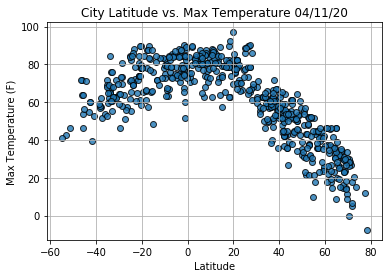

In [32]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

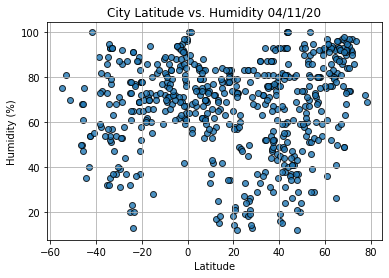

In [33]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

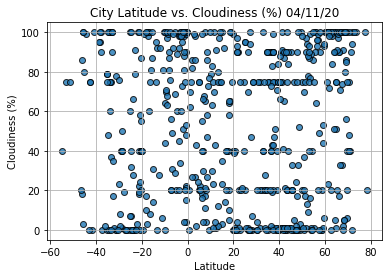

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

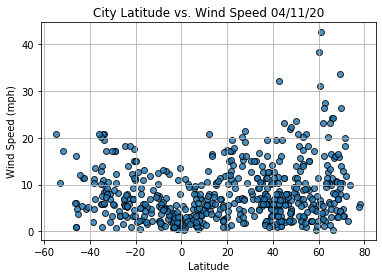

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [36]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [39]:
index13 = city_data_df.loc[13]
index13

City                       Hobart
Lat                        -42.88
Lng                        147.33
Max Temp                    60.01
Humidity                       54
Cloudiness                     75
Wind Speed                  11.41
Country                        AU
Date          2020-04-12 02:10:56
Name: 13, dtype: object

In [40]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
570    False
571    False
572    False
573     True
574     True
Name: Lat, Length: 575, dtype: bool

In [42]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [48]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

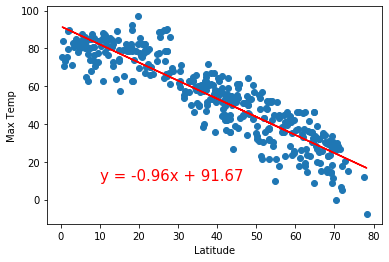

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,10))

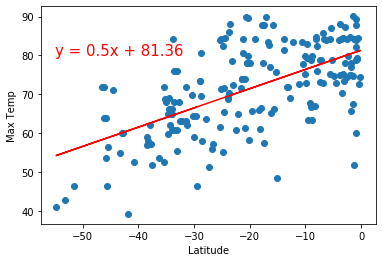

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,80))

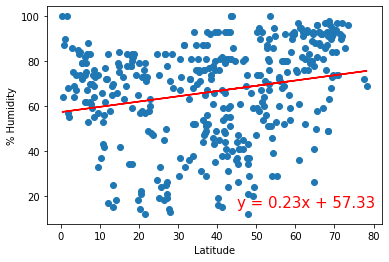

In [62]:
# Linear regression on the Northern Hemisphere Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,15))

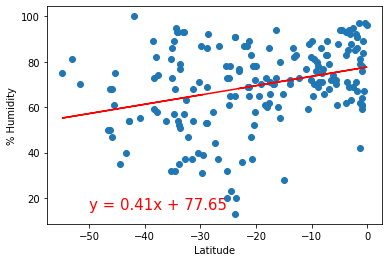

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

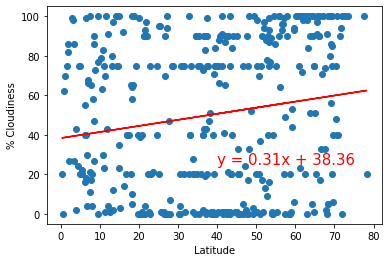

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,25))

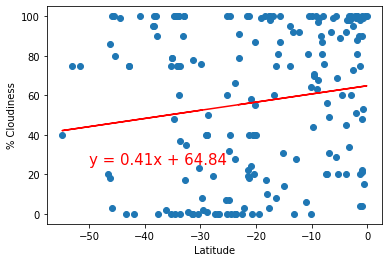

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,25))

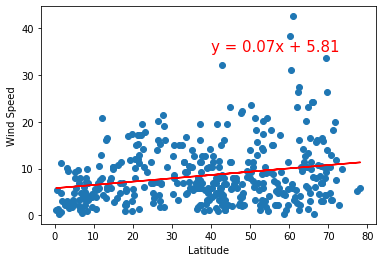

In [70]:
# Linear regression on the Northern Hemisphere for Wind Speeds vs Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

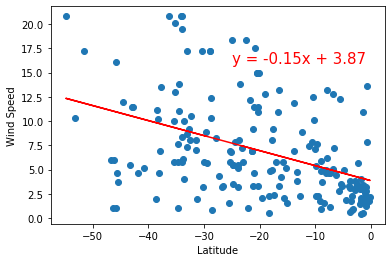

In [74]:
# Linear regression on the Southern Hemisphere Wind Speed on Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-25,16))

In [87]:
import json
import os

filepath = os.path.join("C:/Users/esobieski/Documents/Berkeley/PyBer_Analysis/Resources/youtube_response.json")
with open(filepath) as jsonfile:
    video_json = json.load(jsonfile)
video_json

{'apiVersion': '2.0',
 'data': {'updated': '2010-01-07T19:58:42.949Z',
  'totalItems': 800,
  'startIndex': 1,
  'itemsPerPage': 1,
  'items': [{'id': 'hYB0mn5zh2c',
    'uploaded': '2007-06-05T22:07:03.000Z',
    'updated': '2010-01-07T13:26:50.000Z',
    'uploader': 'GoogleDeveloperDay',
    'category': 'News',
    'title': 'Google Developers Day US - Maps API Introduction',
    'description': 'Google Maps API Introduction ...',
    'tags': ['GDD07', 'GDD07US', 'Maps'],
    'thumbnail': {'default': 'http://i.ytimg.com/vi/hYB0mn5zh2c/default.jpg',
     'hqDefault': 'http://i.ytimg.com/vi/hYB0mn5zh2c/hqdefault.jpg'},
    'player': {'default': 'http://www.youtube.com/watch?vu003dhYB0mn5zh2c'},
    'content': {'1': 'rtsp://v5.cache3.c.youtube.com/CiILENy.../0/0/0/video.3gp',
     '5': 'http://www.youtube.com/v/hYB0mn5zh2c?f...',
     '6': 'rtsp://v1.cache1.c.youtube.com/CiILENy.../0/0/0/video.3gp'},
    'duration': 2840,
    'aspectRatio': 'widescreen',
    'rating': 4.63,
    'ratingCou